In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


# Importing and Splitting the Data

In [2]:
n_classes=10
batch_size=32
epochs=100

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
#X_train = X_train_full[:40000] / 255
#X_val = X_train_full[40000:] / 255

#y_train = y_train_full[:40000] 
#y_val = y_train_full[40000:] 

#X_test = X_test /255

In [5]:
#X_train = X_train.astype('float32')
#X_val = X_val.astype('float32')
#X_test = X_test.astype('float32')

In [6]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [7]:
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


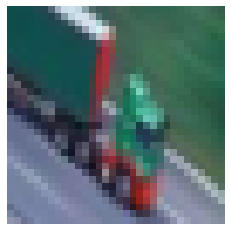

In [8]:
print(y_train[50])
plt.imshow(X_train[50])
plt.axis('off')
plt.show()

In [9]:
keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

# Basic CNN Model

In [10]:
model = keras.models.Sequential([
                    keras.layers.Conv2D(16, (3,3), activation='relu', 
                                                    input_shape=X_train[0].shape, padding='same'),
                    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPooling2D(2, 2),
                    keras.layers.Dropout(.4),

                    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
                    keras.layers.Conv2D(32, (3, 3), activation='relu'),
                    keras.layers.BatchNormalization(),
                    keras.layers.MaxPooling2D(2, 2),
                    keras.layers.Dropout(.4),

                    keras.layers.Flatten(),
                    keras.layers.Dense(512, activation='relu'),
                    keras.layers.Dropout(.4),
                    keras.layers.Dense(n_classes, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

In [12]:
train_datagen = ImageDataGenerator(
                                  rotation_range=15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                  )

In [13]:
train_datagen.fit(X_train)

In [14]:
optimiser = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
callback = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(train_datagen.flow(X_train, y_train), epochs=epochs, 
                validation_data=train_datagen.flow(X_test, y_test), 
                shuffle=True, batch_size=batch_size,
                callbacks= callback)

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 1.8717 - accuracy: 0.3364

KeyboardInterrupt: 

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.5847 - accuracy: 0.4560


[1.5847479104995728, 0.4560000002384186]

# Transfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pretrain = InceptionV3(include_top=False, 
                    weights='imagenet', 
                    input_shape=X_train[0].shape)